In [1]:
from CanDataLoader import CanDataLoader
from dotenv import load_dotenv
import os

load_dotenv()
data_path = os.getenv('DATA_PATH')
dataset = CanDataLoader(data_path, log_verbosity=2)


Found ambient and attack directories.
Loading CAN metadata...
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_benign_anomaly.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_radio_infotainment.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_winter.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_exercise_all_bits.parquet
  Looking for /Users/jamescourson/Documen

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_99651/1128581318.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


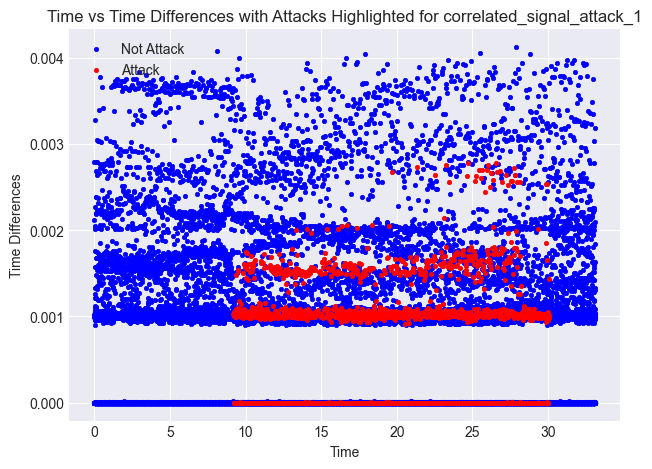

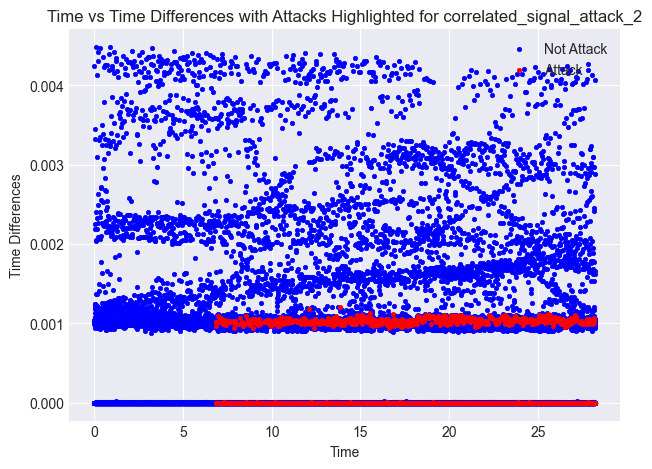

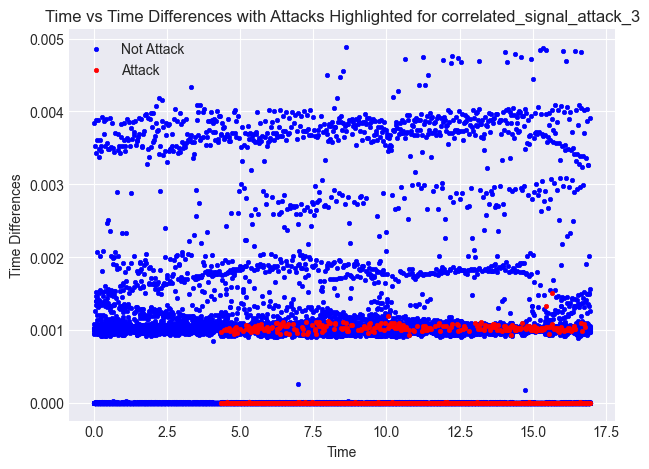

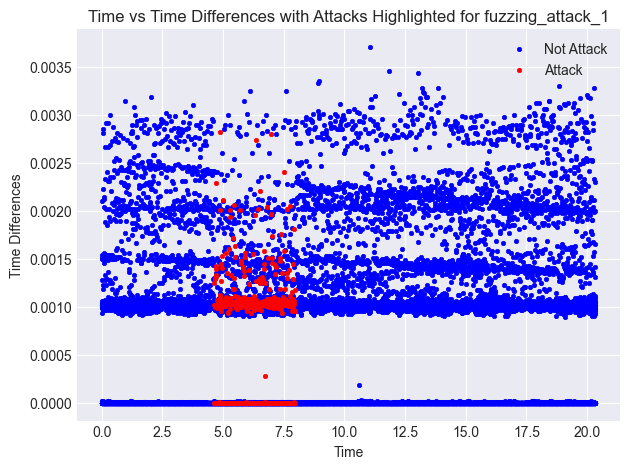

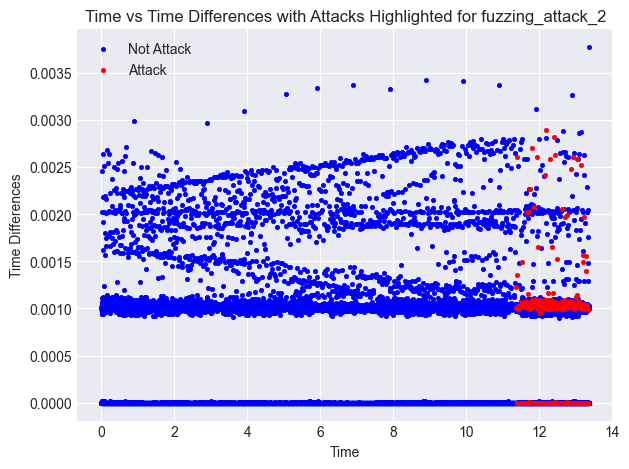

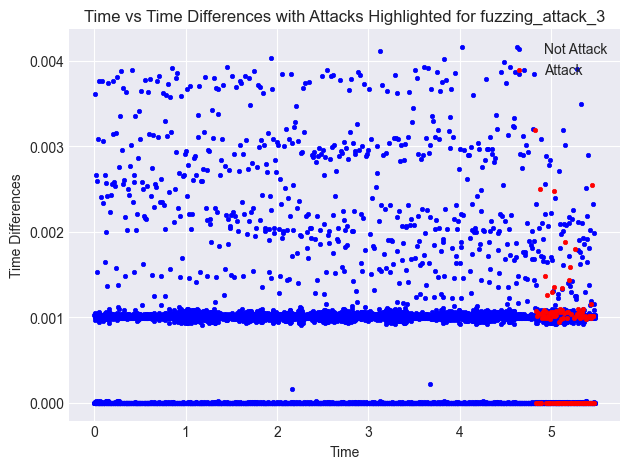

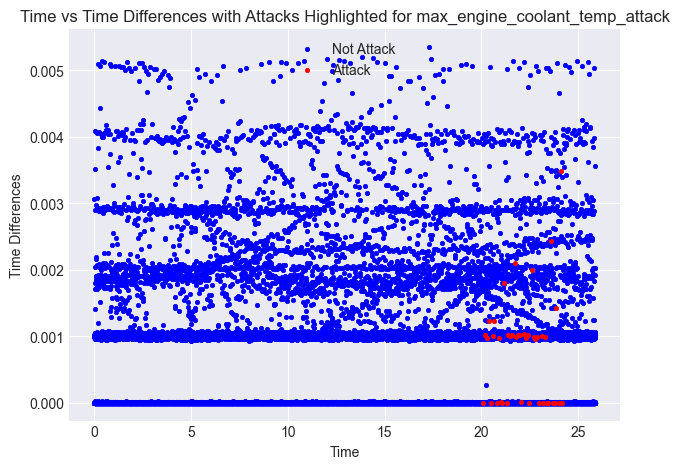

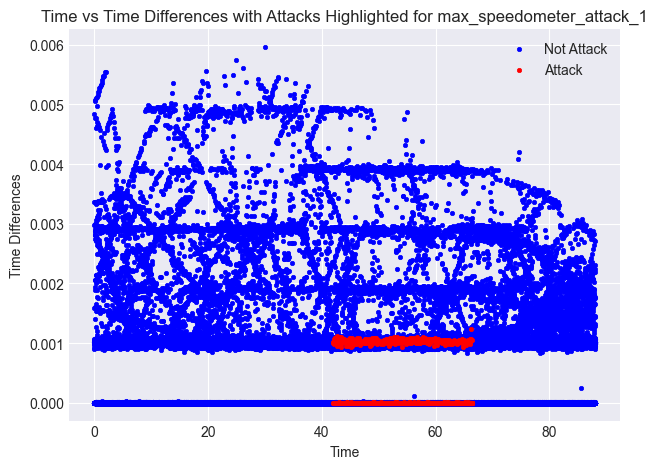

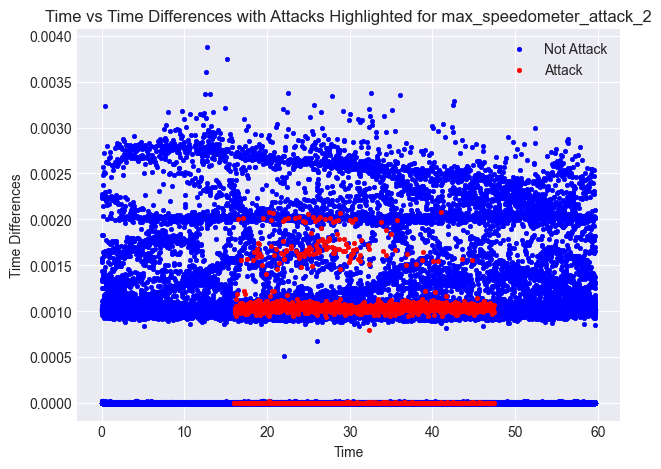

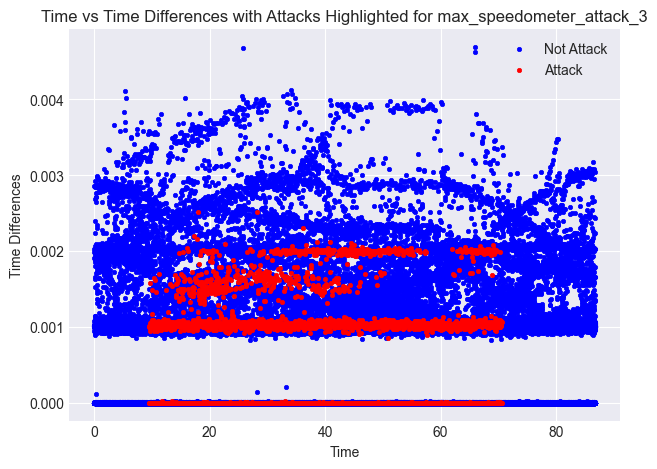

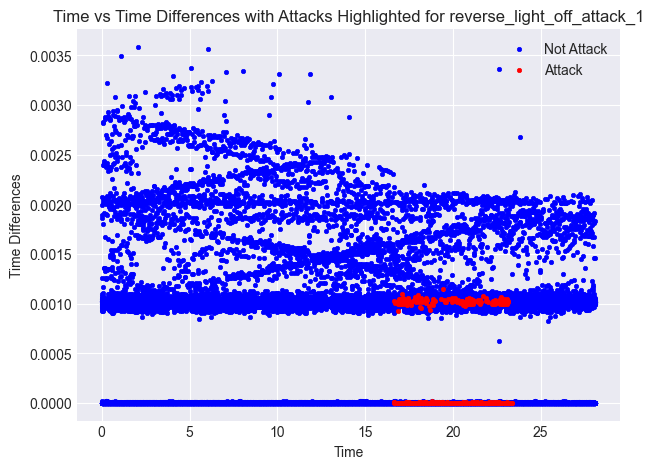

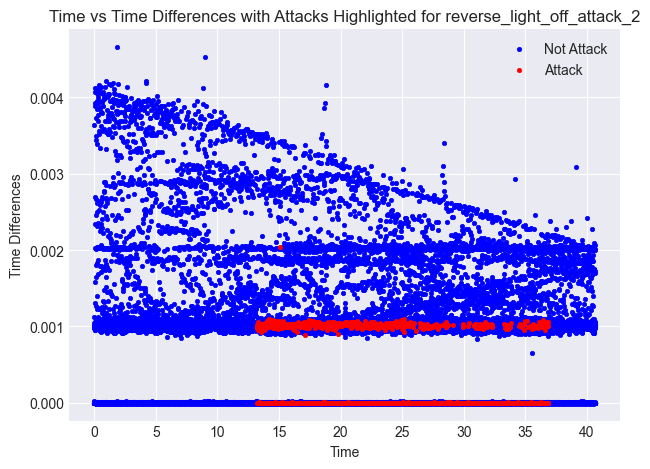

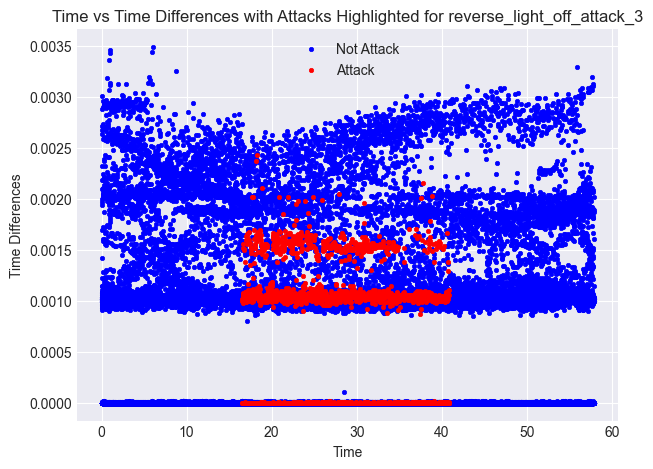

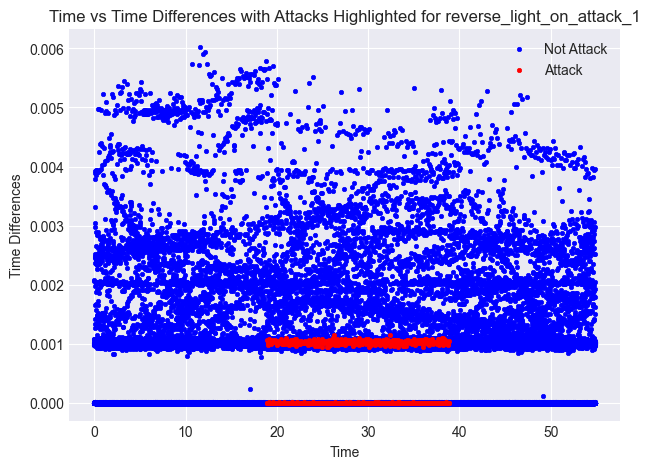

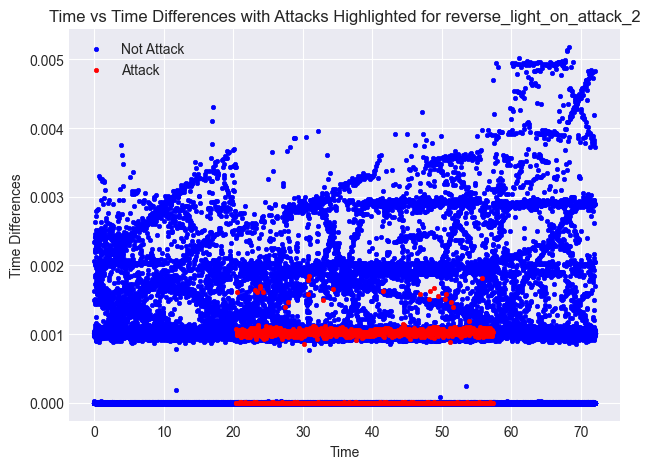

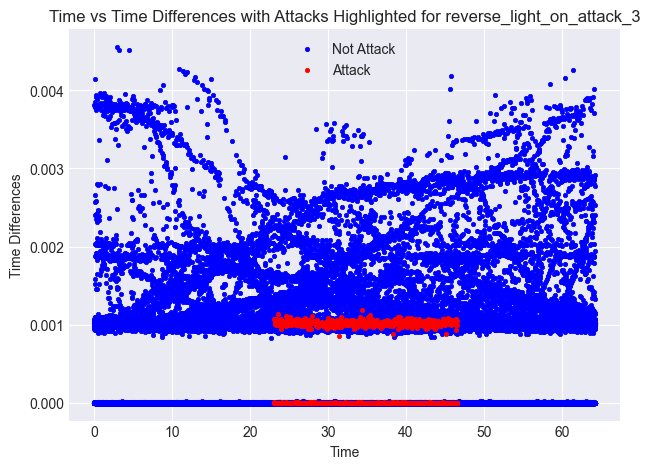

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_msg"], c="blue", s=10, label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["delta_time_last_msg"], c="red", s=10, label="Attack", linewidth=0.5)
        

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()